# Analysis data Pressure Rinser GBL

## Import data

In [296]:
import pandas as pd

df_ori = pd.read_csv('prg.csv')
df_ori

,id,l,p,t,sv,fw,pr,co,fr,vr,aiw,lo,lpim,lprzim
0,9453385,22.11.25 T1,112000000896,28/11/2024 13:32:51,8,0.06,5.14,12.20,0.00,0.00,8,480,525,373
1,9453384,22.11.25 T1,112000000896,28/11/2024 13:32:50,8,0.06,5.14,12.20,0.00,0.00,8,479,525,377
2,9453383,22.11.25 T1,112000000896,28/11/2024 13:32:49,8,0.06,5.14,12.20,0.00,0.00,8,480,524,383
3,9453382,22.11.25 T1,112000000896,28/11/2024 13:32:48,8,0.06,5.14,12.20,0.00,0.00,8,480,524,383
4,9453381,22.11.25 T1,112000000896,28/11/2024 13:32:47,8,0.06,5.14,12.20,0.00,0.00,8,479,527,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9353390,21.11.25 T1,112000000895,21/11/2024 16:13:45,4,7.41,1.07,5.69,0.51,0.63,8,507,478,394
99996,9353389,21.11.25 T1,112000000895,21/11/2024 16:13:44,4,7.41,1.07,5.69,0.51,0.63,8,507,475,396
99997,9353388,21.11.25 T1,112000000895,21/11/2024 16:13:43,4,7.41,1.07,5.69,0.52,0.63,8,506,474,390
99998,9353387,21.11.25 T1,112000000895,21/11/2024 16:13:42,4,7.41,1.07,5.69,0.52,0.63,8,506,477,388


In [298]:
df = df_ori.copy()

In [300]:
df.shape

(100000, 14)

In [302]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100000.0,9.403386e+06,28867.657797,9.353386e+06,9.378386e+06,9.403386e+06,9.428385e+06,9.453385e+06
p,100000.0,1.120000e+11,0.493239,1.120000e+11,1.120000e+11,1.120000e+11,1.120000e+11,1.120000e+11
sv,100000.0,7.585200e+00,1.219490,4.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
fw,100000.0,9.242331e-01,2.422482,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.071000e+01
pr,100000.0,1.899240e+00,1.573761,0.000000e+00,0.000000e+00,2.330000e+00,2.660000e+00,7.400000e+00
co,100000.0,5.928803e+00,4.016722,0.000000e+00,0.000000e+00,7.720000e+00,8.260000e+00,1.576000e+01
fr,100000.0,5.172248e-01,0.509665,-1.000000e-01,0.000000e+00,7.500000e-01,1.030000e+00,1.220000e+00
vr,100000.0,6.352482e-01,0.625991,-1.300000e-01,0.000000e+00,9.200000e-01,1.270000e+00,1.500000e+00
aiw,100000.0,6.658040e+00,1.888655,4.000000e+00,4.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
lo,100000.0,4.741695e+02,21.067768,3.670000e+02,4.690000e+02,4.810000e+02,4.870000e+02,5.200000e+02


### menambahkan column target 

Target memprediksi nilai pressure rinser saat drop atau nilai kurang dari 1

In [306]:
#menambahkan target (pr : pressure rinser, kalau 0 tidak ada drop, sebaliknya kalau 1 berarti drop)
df['pr_target'] = (df['pr'] < 1).astype(int)


In [308]:
# Menangani column waktu agar bisa digunakan untuk analisis

df['t'] = pd.to_datetime(df['t'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)

In [310]:
df

,id,l,p,t,sv,fw,pr,co,fr,vr,aiw,lo,lpim,lprzim,pr_target
0,9453385,22.11.25 T1,112000000896,2024-11-28 13:32:51,8,0.06,5.14,12.20,0.00,0.00,8,480,525,373,0
1,9453384,22.11.25 T1,112000000896,2024-11-28 13:32:50,8,0.06,5.14,12.20,0.00,0.00,8,479,525,377,0
2,9453383,22.11.25 T1,112000000896,2024-11-28 13:32:49,8,0.06,5.14,12.20,0.00,0.00,8,480,524,383,0
3,9453382,22.11.25 T1,112000000896,2024-11-28 13:32:48,8,0.06,5.14,12.20,0.00,0.00,8,480,524,383,0
4,9453381,22.11.25 T1,112000000896,2024-11-28 13:32:47,8,0.06,5.14,12.20,0.00,0.00,8,479,527,373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9353390,21.11.25 T1,112000000895,2024-11-21 16:13:45,4,7.41,1.07,5.69,0.51,0.63,8,507,478,394,0
99996,9353389,21.11.25 T1,112000000895,2024-11-21 16:13:44,4,7.41,1.07,5.69,0.51,0.63,8,507,475,396,0
99997,9353388,21.11.25 T1,112000000895,2024-11-21 16:13:43,4,7.41,1.07,5.69,0.52,0.63,8,506,474,390,0
99998,9353387,21.11.25 T1,112000000895,2024-11-21 16:13:42,4,7.41,1.07,5.69,0.52,0.63,8,506,477,388,0


In [312]:
df.isnull().mean()

id           0.0
l            0.0
p            0.0
t            0.0
sv           0.0
fw           0.0
pr           0.0
co           0.0
fr           0.0
vr           0.0
aiw          0.0
lo           0.0
lpim         0.0
lprzim       0.0
pr_target    0.0
dtype: float64

## Feature Enginering

### Split between X dan y

In [316]:
df.columns

Index(['id', 'l', 'p', 't', 'sv', 'fw', 'pr', 'co', 'fr', 'vr', 'aiw', 'lo',
       'lpim', 'lprzim', 'pr_target'],
      dtype='object')

In [318]:
X = df.drop(['pr_target','id','l', 'p', 't', 'pr'],axis=1)
y = df.pr_target
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: pr_target, Length: 100000, dtype: int32

### Split between Train set and Test set


In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (80000, 9)
Test Size:  (20000, 9)


### Handle Outlier

cek nilai skewnes untuk numerical columns only

In [322]:
# Create function to check skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

In [324]:
X_train.columns

Index(['sv', 'fw', 'co', 'fr', 'vr', 'aiw', 'lo', 'lpim', 'lprzim'], dtype='object')

In [326]:
check_skewness(X_train, 'sv', 'fw', 'co', 'fr', 'vr', 'aiw', 'lo', 'lpim', 'lprzim')


{'sv': -2.613580424523152,
 'fw': 2.6873259915643604,
 'co': -0.43938312532102475,
 'fr': -0.010522053790850035,
 'vr': -0.010219913007492008,
 'aiw': -0.7007852928415527,
 'lo': -2.2463323185489723,
 'lpim': 0.9773178234343953,
 'lprzim': 1.5277723428225631}

In [200]:
skewness_results = check_skewness(X_train, 'sv', 'fw', 'co', 'fr', 'vr', 'aiw', 'lo', 'lpim', 'lprzim')

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

sv: -2.613580424523152
fw: 2.6873259915643604
co: -0.43938312532102475
fr: -0.010522053790850035
vr: -0.010219913007492008
aiw: -0.7007852928415527
lo: -2.2463323185489723
lpim: 0.9773178234343953
lprzim: 1.5277723428225631


In [202]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5:
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: ['co', 'fr', 'vr']
Skewed: ['aiw', 'lpim']
Extreme Skewed: ['sv', 'fw', 'lo', 'lprzim']


Membuat function utk cek persentase outlier, jika <=5% boleh dipertimbangkan utk trim, >5% wajib capping. Metode capp nya boleh pakai winsorizer atau yg lain.¶

In [205]:
# Create function to calculate outlier percentages for normal distribution
def calculate_outlier_percentages_normal(df, columns):
    for variable in columns:
        std = df[variable].std()
        lower_boundary = df[variable].quantile(0.25) - (std * 3)
        upper_boundary = df[variable].quantile(0.75) + (std * 3)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100

        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# Calcuate outlier percentages before handling
print(calculate_outlier_percentages_normal(X_train, normal_columns))


Percentage of outliers in co: 0.00%
Percentage of outliers in fr: 0.00%
Percentage of outliers in vr: 0.00%
None


In [207]:
# Create function to calculate outlier percentages for skew
def calculate_outlier_percentages_skew(df, columns, distance):
    for variable in columns:
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100

        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# Calcuate outlier percentages before handling
print(calculate_outlier_percentages_skew(X_train, skewed_columns, 1.5))
print(calculate_outlier_percentages_skew(X_train, extreme_skewed_columns, 3))

Percentage of outliers in aiw: 0.00%
Percentage of outliers in lpim: 19.35%
None
Percentage of outliers in sv: 10.29%
Percentage of outliers in fw: 16.39%
Percentage of outliers in lo: 2.30%
Percentage of outliers in lprzim: 1.17%
None


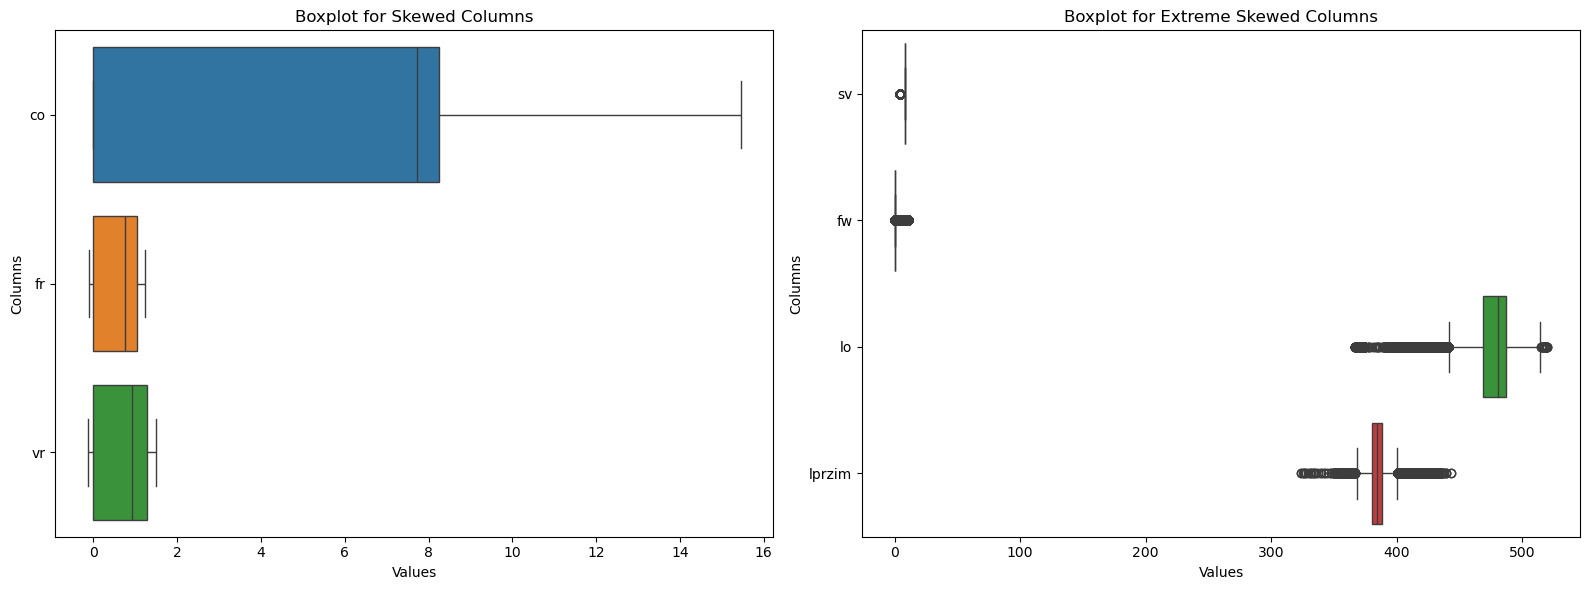

In [209]:
# Create a figure and two subplots side by side
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for skewed columns
sns.boxplot(data=X_train[normal_columns], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Skewed Columns")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for extreme skewed columns
sns.boxplot(data=X_train[extreme_skewed_columns], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Extreme Skewed Columns")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

In [211]:
import numpy as np

def calculate_outlier_percentages_zscore(df, columns, threshold):
    for variable in columns:
        z_scores = np.abs((df[variable] - df[variable].mean()) / df[variable].std())
        outliers = df[z_scores > threshold]
        outlier_percentage = len(outliers) / len(df) * 100
        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# Calculate outlier percentages after handling skewness or data cleaning
print(calculate_outlier_percentages_zscore(X_train, skewed_columns, 3))
print(calculate_outlier_percentages_zscore(X_train, extreme_skewed_columns, 3))

Percentage of outliers in aiw: 0.00%
Percentage of outliers in lpim: 0.01%
None
Percentage of outliers in sv: 0.00%
Percentage of outliers in fw: 3.09%
Percentage of outliers in lo: 2.22%
Percentage of outliers in lprzim: 1.73%
None


### Mencari nilai korelasi, dan menghilangkan kolom yg tidak berkorelasi

In [213]:
import phik

In [215]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1)

# Show X_train
concat_train.head()

,sv,fw,co,fr,vr,aiw,lo,lpim,lprzim,pr_target
75220,8,0.06,7.50,0.78,0.95,8,493,474,380,0
48955,8,0.06,7.94,0.99,1.21,4,435,491,387,0
44966,8,0.06,8.13,1.03,1.26,8,478,490,373,0
13568,8,2.08,0.00,0.00,0.00,8,486,577,392,1
92727,8,0.06,8.20,1.08,1.33,8,477,480,379,0


In [217]:
concat_train.columns

Index(['sv', 'fw', 'co', 'fr', 'vr', 'aiw', 'lo', 'lpim', 'lprzim',
       'pr_target'],
      dtype='object')

In [219]:
# Create function to correlate variables with default
def compute_phik_correlation(dataframe, columns, target):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix[target]

# Define the list of columns for each subset
columns = ['sv', 'fw', 'co', 'fr', 'vr', 'aiw', 'lo', 'lpim', 'lprzim',
       'pr_target']
target = ['pr_target']

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(concat_train, columns, target)

# Print result
print(correlation)

interval columns not set, guessing: ['sv', 'fw', 'co', 'fr', 'vr', 'aiw', 'lo', 'lpim', 'lprzim', 'pr_target']
           pr_target
sv          0.343669
fw          0.359908
co          0.960650
fr          0.905918
vr          0.905822
aiw         0.064762
lo          0.333230
lpim        0.843306
lprzim      0.215900
pr_target   1.000000


In [221]:
X_test

,sv,fw,co,fr,vr,aiw,lo,lpim,lprzim
75721,8,0.06,7.54,0.95,1.17,4,462,470,387
80184,8,0.06,7.75,0.96,1.18,8,485,476,390
19864,8,0.06,0.00,0.00,0.00,8,475,535,375
76699,8,0.06,7.72,0.99,1.22,8,485,469,386
92991,8,0.06,8.13,1.08,1.33,8,477,478,380
...,...,...,...,...,...,...,...,...,...
32595,8,0.06,0.00,0.00,0.00,8,482,413,379
29313,8,0.06,0.00,0.00,0.00,8,487,466,382
37862,8,0.06,7.25,0.77,0.95,4,443,482,391
53421,8,0.06,8.20,1.02,1.25,8,484,493,385


In [334]:
X_test = X_test.drop(['aiw'], axis = 1) # cara 2
#X_train = X_train.drop(['aiw'], axis = 1) # cara 2
# Show columns
print(X_train.columns)
print(X_test.columns)


Index(['sv', 'fw', 'co', 'fr', 'vr', 'lo', 'lpim', 'lprzim'], dtype='object')
Index(['sv', 'fw', 'co', 'fr', 'vr', 'lo', 'lpim', 'lprzim'], dtype='object')


In [239]:
num_columns = X_train.select_dtypes(exclude=['object']).columns.tolist() # Cara1
#cara 2:
num_normal = []
num_skew = []
cat_encoded = []
cat_ordinal = []
cat_nominal = []
print(f'Numerical normal columns:\n{num_normal}')
print(f'Numerical skew columns:\n{num_skew}')
print(f'Categorical encoded columns:\n{cat_encoded}')

Numerical normal columns:
[]
Numerical skew columns:
[]
Categorical encoded columns:
[]


### menentukan X tes dan X train

In [241]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
#X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
#X_test_cat = X_test[cat_columns]

X_train_num

,sv,fw,co,fr,vr,lo,lpim,lprzim
75220,8,0.06,7.50,0.78,0.95,493,474,380
48955,8,0.06,7.94,0.99,1.21,435,491,387
44966,8,0.06,8.13,1.03,1.26,478,490,373
13568,8,2.08,0.00,0.00,0.00,486,577,392
92727,8,0.06,8.20,1.08,1.33,477,480,379
...,...,...,...,...,...,...,...,...
6265,8,0.06,11.63,0.00,0.00,422,471,430
54886,8,0.06,7.97,0.96,1.19,490,497,382
76820,8,0.06,7.72,0.98,1.21,485,474,386
860,8,0.58,12.07,0.00,0.00,488,519,388


### Membuat scaling min max karena data bukan distribusi normal

In [243]:
#Feature Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#scaler.fit(X_train_num)
scaler = MinMaxScaler()
scaler.fit(X_train_num)


X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[1.        , 0.        , 0.48543689, ..., 0.82352941, 0.44711538,
        0.47058824],
       [1.        , 0.        , 0.51391586, ..., 0.44444444, 0.52884615,
        0.52941176],
       [1.        , 0.        , 0.52621359, ..., 0.7254902 , 0.52403846,
        0.41176471],
       ...,
       [1.        , 0.        , 0.49967638, ..., 0.77124183, 0.44711538,
        0.5210084 ],
       [1.        , 0.04882629, 0.78122977, ..., 0.79084967, 0.66346154,
        0.53781513],
       [0.        , 0.74929577, 0.        , ..., 0.67973856, 0.87980769,
        0.57983193]])

## Modeling

In [256]:
from sklearn.preprocessing import MinMaxScaler

preprocess = MinMaxScaler()  # Menggunakan MinMaxScaler untuk normalisasi

pipe_log = make_pipeline(preprocess, LogisticRegression(max_iter=1000000))
pipe_svc = make_pipeline(preprocess, SVC())
pipe_dt = make_pipeline(preprocess, DecisionTreeClassifier(random_state=10))
pipe_rf = make_pipeline(preprocess, RandomForestClassifier(random_state=10))
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier())
pipe_nb = make_pipeline(preprocess, GaussianNB())
pipe_ada = make_pipeline(preprocess, AdaBoostClassifier())


In [262]:
# setting kfold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits = 5)

# Define Cross Validation for each model
cv_log_model = cross_val_score(pipe_log, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_svm_model = cross_val_score(pipe_svc, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_nb_model = cross_val_score(pipe_nb, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_ada_model = cross_val_score(pipe_ada, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)

In [264]:
# Finding Best Model based on Cross_Val_Score (mean)
name_model = []
cv_scores = 0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],
                   ['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model']):
  print(name)
  print('f1score - All - Cross Validation :', cv)
  print('f1score - Mean - Cross Validation :', cv.mean())
  print('f1score - std - Cross Validation :', cv.std())
  print('f1score - Range of Test Set :', (cv.mean()-cv.std()), '-' , (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cv_scores:
    cv_scores = cv.mean()
    name_model = name
  else:
    pass
print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

log_model
f1score - All - Cross Validation : [0.99352603 0.99398359 0.99352367 0.99535477 0.99453054]
f1score - Mean - Cross Validation : 0.9941837201618575
f1score - std - Cross Validation : 0.0006928067284916169
f1score - Range of Test Set : 0.9934909134333659 - 0.9948765268903491
--------------------------------------------------
svm_model
f1score - All - Cross Validation : [0.99361197 0.99379902 0.99288061 0.99480448 0.99443583]
f1score - Mean - Cross Validation : 0.9939063831293744
f1score - std - Cross Validation : 0.0006689257908268408
f1score - Range of Test Set : 0.9932374573385475 - 0.9945753089202013
--------------------------------------------------
dt_model
f1score - All - Cross Validation : [0.99990926 0.99963709 0.99990928 0.99972789 0.99954657]
f1score - Mean - Cross Validation : 0.9997460185714477
f1score - std - Cross Validation : 0.00014510580965693872
f1score - Range of Test Set : 0.9996009127617907 - 0.9998911243811047
----------------------------------------------

In [276]:
# Fit pipeline on the training data
pipe_ada.fit(X_train, y_train)

C:\Users\rkurniawan\.conda\envs\myml2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

In [278]:
# Get predictions for both training and test data
y_pred_train = pipe_ada.predict(X_train)
y_pred_test = pipe_ada.predict(X_test)

In [280]:
from sklearn.metrics import recall_score
# Print recall score
# print('Recall Score - Train Set  : ', recall_score(y_resample, y_pred_train))
print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test))

Recall Score - Test Set   :  0.9997111079011989


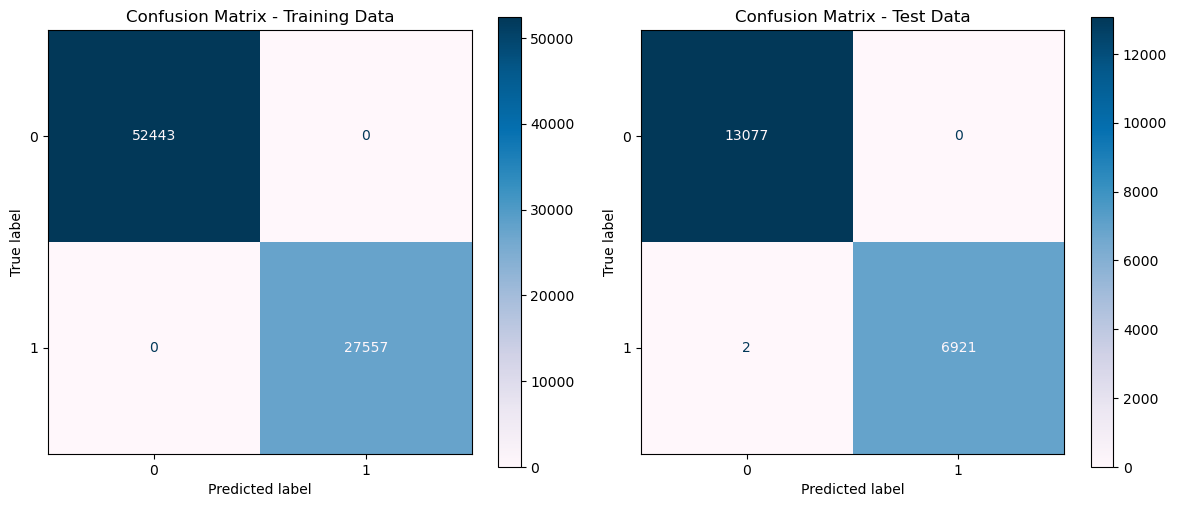

In [284]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(pipe_ada, X_train, y_train, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(pipe_ada, X_test, y_test, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

In [286]:
# Create function to create reports
def performance_report(all_reports, y_resample, y_pred_train, y_test, y_pred_test, name):
    # Calculate recall scores
    score_reports = {
        'Recall Train Set': recall_score(y_resample, y_pred_train),
        'Recall Test Set': recall_score(y_test, y_pred_test),
    }

    # Calculate confusion matrices for train and test sets
    cm_train = confusion_matrix(y_resample, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Extract false negatives from the confusion matrices and add to the report
    score_reports['False Negative Train'] = cm_train[1, 0]
    score_reports['False Negative Test'] = cm_test[1, 0]

    # Store the report in the dictionary with the specified model name
    all_reports[name] = score_reports
    return all_reports

all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Logistic without Tuning')

pd.DataFrame(all_reports)

,Logistic without Tuning
Recall Train Set,1.000000
Recall Test Set,0.999711
False Negative Train,0.000000
False Negative Test,2.000000


### Simpan model machine learning

In [290]:
import pickle

# Assume you have trained a model, such as AdaBoostClassifier
# For example, you can train the AdaBoostClassifier model on X_train and y_train:
# pipe_ada.fit(X_train, y_train)  # This is an example of fitting the AdaBoost model.

# Save the trained model to a file
with open('best_ada_model.pkl', 'wb') as model_file:
    pickle.dump(pipe_ada, model_file)  # Replace pipe_ada with the actual trained model



In [292]:
# To load the model back later
with open('best_ada_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now, you can use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)


Accuracy: 0.9999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13077
           1       1.00      1.00      1.00      6923

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[13077     0]
 [    2  6921]]


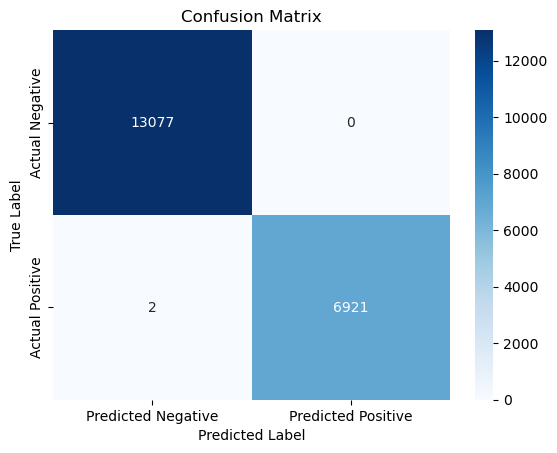

                      AdaBoost Model After Loading
Recall Train Set                          0.999711
Recall Test Set                           0.999711
False Negative Train                      2.000000
False Negative Test                       2.000000


In [294]:
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Langkah 1: Memuat model yang disimpan
with open('best_ada_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Langkah 2: Melakukan prediksi dengan model yang dimuat
y_pred = loaded_model.predict(X_test)

# Langkah 3: Evaluasi model

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Menghitung classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualisasi confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Langkah 4: Menyusun laporan performa
all_reports = {}
all_reports = performance_report(all_reports, y_test, y_pred, y_test, y_pred, 'AdaBoost Model After Loading')

# Menampilkan laporan dalam bentuk DataFrame
report_df = pd.DataFrame(all_reports)
print(report_df)

# Menyimpan laporan ke CSV
report_df.to_csv('model_performance_report.csv', index=False)
